# Perform EDA for this given Dataset.

In [78]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [79]:
# Reading the Dataset
dataset = pd.read_csv("drug200.csv")

In [80]:
# Dataset
dataset

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [81]:
dataset.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [82]:
dataset.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


# Plot Distribution curve for Age along with histogram.

In [83]:
# Age
Age = dataset["Age"]
Age

0      23
1      47
2      47
3      28
4      61
       ..
195    56
196    16
197    52
198    23
199    40
Name: Age, Length: 200, dtype: int64

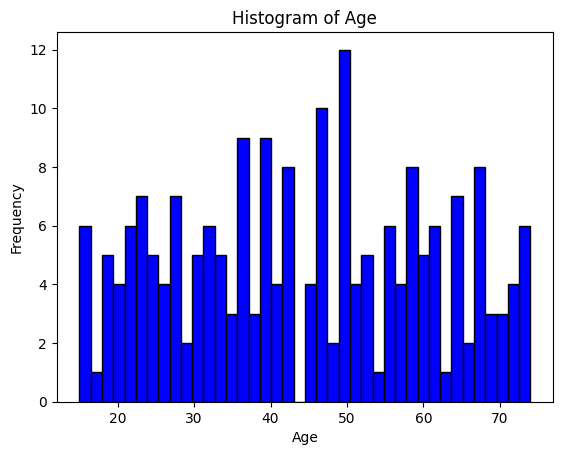

In [84]:
# Histogram
plt.hist(Age, bins = 40, color = "blue", edgecolor = "black")
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Calculate Q1,Q2,Q3 and IQR.

In [85]:
Q1 = np.percentile(Age, 25)
Q1

np.float64(31.0)

In [86]:
Q2 = np.percentile(Age, 50)
Q2

np.float64(45.0)

In [87]:
Q3 = np.percentile(Age, 75)
Q3

np.float64(58.0)

In [88]:
IQR = Q3 - Q1
IQR

np.float64(27.0)

# Calculate Q1,Q2,Q3 and IQR without using np.percentile function. Calculate lower and upper bound values.


In [89]:
# Q1, Q2, Q3 and IQR without using Library
def calculate_percentile(data, percentile):
    sorted_data = sorted(data)

    index = (percentile / 100) * (len(sorted_data) - 1)
    lower_index = int(index)
    upper_index = lower_index + 1

    if upper_index < len(sorted_data):
        fraction = index - lower_index
        result = sorted_data[lower_index] + fraction * (
            sorted_data[upper_index] - sorted_data[lower_index]
        )
    else:
        result = sorted_data[lower_index]
    return result


Q1 = calculate_percentile(Age, 25)
Q2 = calculate_percentile(Age, 50)
Q3 = calculate_percentile(Age, 75)
IQR = Q3 - Q1
print("Q1:", Q1, "\nQ2:", Q2, "\nQ3:", Q3)
print("IQR:", IQR)

Q1: 31.0 
Q2: 45.0 
Q3: 58.0
IQR: 27.0


#  Plot box plot for Age.

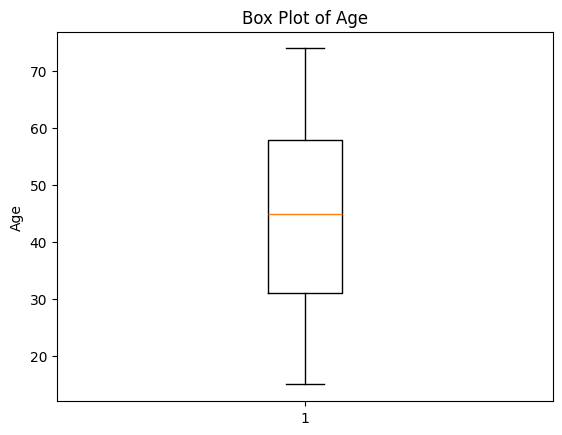

In [90]:
# Box Plot of Age
plt.boxplot(Age)
plt.title("Box Plot of Age")
plt.ylabel("Age")
plt.show()

# Frequency Table of Age

In [91]:
Frequency = pd.Series(Age).value_counts()
Frequency

Age
47    8
23    7
28    7
49    7
32    6
39    6
50    5
60    5
22    5
37    5
58    5
43    4
41    4
57    4
65    4
61    4
74    4
45    4
56    4
24    4
26    4
67    4
68    4
31    4
34    4
51    4
42    4
20    4
72    4
36    4
69    3
18    3
16    3
35    3
59    3
64    3
53    3
38    3
70    3
15    3
40    3
55    2
52    2
48    2
29    2
73    2
46    2
66    2
62    2
19    2
63    1
33    1
17    1
54    1
30    1
21    1
25    1
Name: count, dtype: int64

# Calculate frequency table as well for age column. Ranges for this can be in multiple of 10, e.g. 10-20,20-30,etc..

In [92]:
age_bins = pd.cut(dataset['Age'], bins=range(10, 81, 10), right=False)
age_frequency = age_bins.value_counts().sort_index()

print(age_frequency)

Age
[10, 20)    12
[20, 30)    35
[30, 40)    37
[40, 50)    38
[50, 60)    33
[60, 70)    32
[70, 80)    13
Name: count, dtype: int64


# EDA

In [93]:
# 1. What is a Gender distribution of data?
gender_frequency = dataset["Sex"].value_counts()
gender_frequency

Sex
M    104
F     96
Name: count, dtype: int64

In [94]:
# 2. What percent of total population have high cholesterol & high BP?
high_chol_bp = dataset[(dataset["Cholesterol"] == "HIGH") & (dataset["BP"] == "HIGH")].shape[0]
total = dataset.shape[0]
percentage_high_chol_bp = (high_chol_bp / total)*100
percentage_high_chol_bp

17.5

In [95]:
# 3. What are the unique values of Drugs given in data? (df["Drug"].unique)
unique_drugs = dataset["Drug"].unique()
unique_drugs

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [96]:
# 4. How many people have high cholesterol before age of 30?
high_chol_before_30 = dataset[(dataset["Cholesterol"] == "HIGH") & (dataset["Age"] < 30)].shape[0]
high_chol_before_30

26